In [6]:
pip install librosa


  Using cached https://files.pythonhosted.org/packages/e4/1c/23ef2fd02913d65d43dc7516fc829af709314a66c6f0bdc2e361fdcecc2d/librosa-0.9.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/91/d4/3b4c8e5a30604df4c7518c562d4bf0502f2fa29221459226e140cf846512/joblib-1.2.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/cd/5a/14906b5f4911ab4d6de179667ff7aad4412b3b2456f36060b6bbe86dff9e/soundfile-0.11.0-py2.py3-none-win32.whl
  Using cached https://files.pythonhosted.org/packages/17/07/68df07679ec4a4a24bff00147a14908aa73e9e8912d142886e8d0e1e3d64/scipy-1.9.2.tar.gz
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'c:\Users\krzysztof\AppData\Local\Programs\Python\Python38-32\python.exe' 'c:\Users\krzysztof\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pip\_vendor\pep517\_in_process.py' get_requires_for_build_wheel 'C:\Users\KRZYSZ~1\AppData\Local\Temp\tmpq3pmdczz'
       cwd: C:\Users\krzysztof\AppData\Local\Temp\pip-install-3_n5fh1h\scipy
  Complete output (65 lines):
  + meson setup --native-file=C:\Users\krzysztof\AppData\Local\Temp\pip-install-3_n5fh1h\scipy\.mesonpy-native-file.ini -Ddebug=false -Doptimization=2 --prefix=c:\Users\krzysztof\AppData\Local\Programs\Python\Python38-32 C:\Users\krzysztof\AppData\Local\Temp\pip-install-3_n5fh1h\scipy C:\Users\krzysztof\AppData\Local\Temp\pip-install-3_n5fh1h\scipy\.mesonpy-zjwzxlli\build
  The Meson build system
  Version: 0.63.3
  Source dir: C:\Users\krzysztof\AppData\Local\Temp\pip-install-3_n5fh1h\scipy
  Build dir: C:\Users\krzysztof\AppData\Local\Temp\pip-install-3_n

In [7]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'librosa'

In [10]:
# Import audio
audioFile = "audio.wav"
ipd.Audio(audioFile)

In [12]:
# Calculate Short-Time Fourier Transform of audio
audioArray, sampleRate = librosa.load(audioFile)

frameSize = 2048
hopSize = 512

audioSTFT = librosa.stft(audioArray, n_fft=frameSize, hop_length=hopSize)

In [14]:
#Plot Spectrogram
def plotSpectrogram(Y, sampleRate, hopSize, yAxis="linear"):
    plt.figure(figsize=(25,10))
    librosa.display.specshow(Y,sr=sampleRate,hop_length=hopSize,x_axis="time",y_axis=yAxis)
    plt.colorbar(format="%+2.f") 

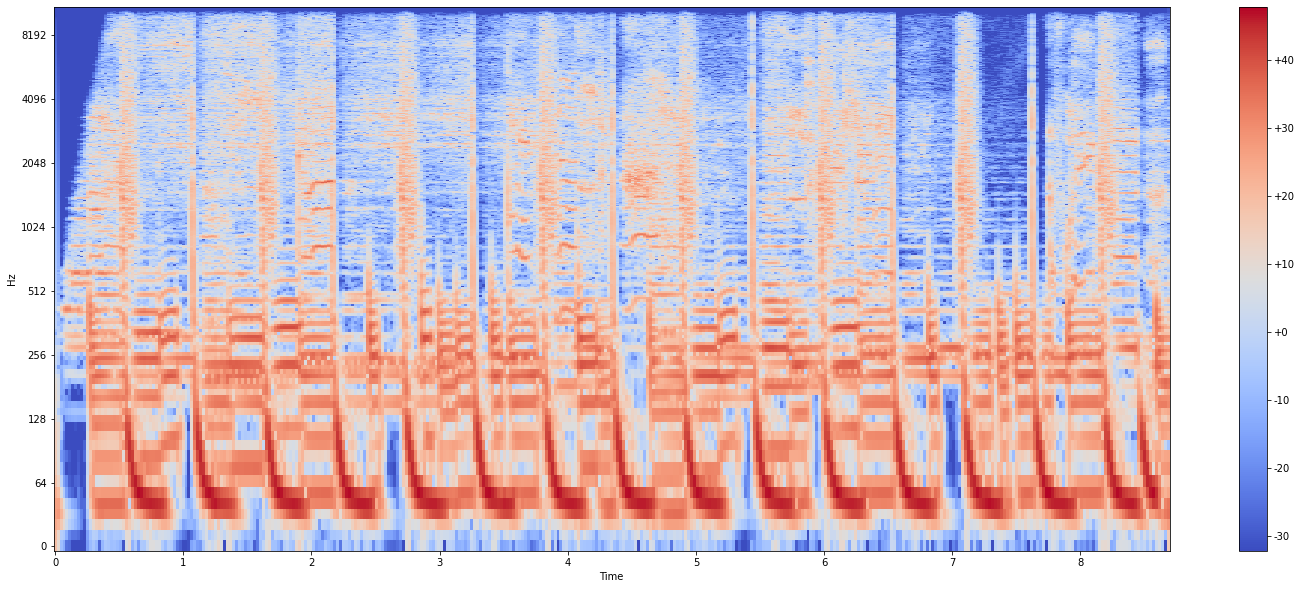

In [18]:
# Calculate Spectrogram
audioSpectrogram = librosa.power_to_db(np.abs(audioSTFT)**2)

plotSpectrogram(audioSpectrogram, sampleRate, hopSize, yAxis="log")